# Representation Learning with Convolutional Neural Networks

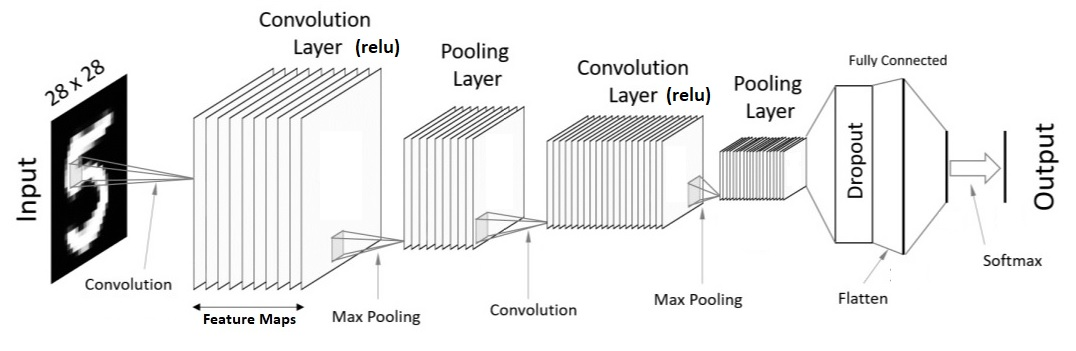

#### Convolution Operation


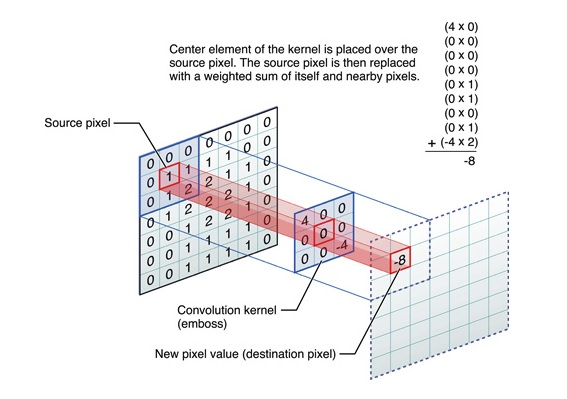

##### --------- **Torch Snippet** ---------
<pre><code>torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, groups=1, bias=True, padding_mode='zeros')</code></pre>
Important arguments: 

*  in_channels (int) – Number of channels in the input 

* out_channels (int) – Number of output channels  

* kernel_size (int or tuple) – Size of the convolving kernel


#### Non-Linearity
* After having convolution layer we use ReLU to break up linearity. Increase nonlinearity. Because images are non linear.

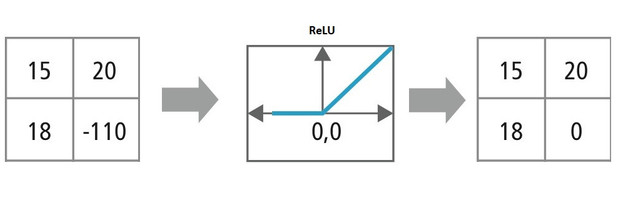

##### --------- **Torch Snippet** ---------
<pre><code>torch.nn.ReLU(inplace: bool = False)

#### Max Pooling
*  We take only max value in a 2X2 window and throw away the rest
*  Only areas of large signal are kept for furthur processing
*  It reduces the spatial dimensions of the input by 1/2 in height and width
*  Incrases receptive field size 


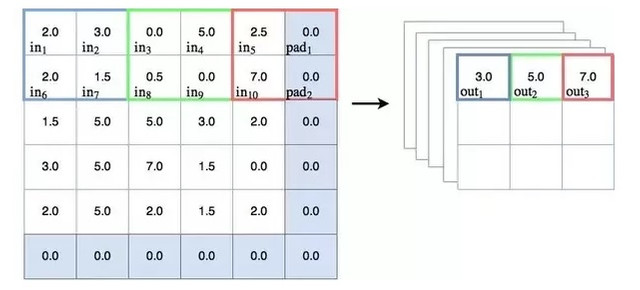

##### --------- **Torch Snippet** ---------
<pre><code>torch.nn.MaxPool2d(kernel_size, stride=None, padding=0, dilation=1, return_indices=False, ceil_mode=False)</code></pre>

Important arguments: 

* kernel_size – the size of the window to take a max over. Recommended: (2,2)

* stride – the stride of the window. Recommended: (2,2)


#### Flattening

We must flatten a array before it can be processed by a fully connected layer

 
  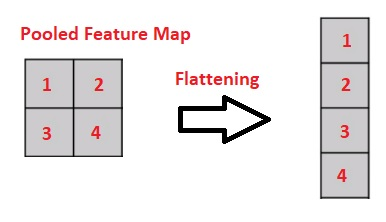

#### Full Connected Layers
*   Neurons in a fully connected layer have connections to all activations in the previous layer
*   Artificial Neural Network

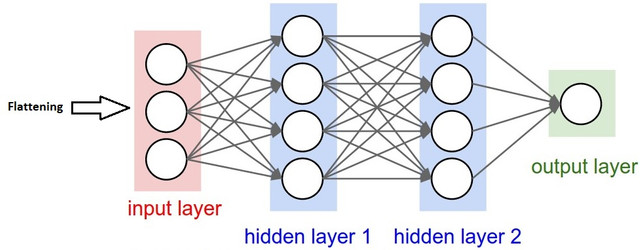

##### --------- **Torch Snippet** ---------
<pre><code>torch.nn.Linear(in_features, out_features, bias=True)

# Training CNNs

**7 Steps of Model Training** 

1. Load Dataset

2. Make Dataset Iterable

3. Create Model Class

4. Instantiate Model Class

5. Instantiate Loss Class

6. Instantiate Optimizer Class

7. Train Model

We will do 2,5 and 6 for you here so you only have to do

1. Load Dataset

2. Create Model Class

3. Instantiate Model Class

4. Train Model


In [1]:
#Importing all the neccessary packages
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F
import torch.nn as nn
import torch.optim as optim


def imshow(img, title):
    npimg = img.numpy() / 2 + 0.5
    plt.figure(figsize=(8, 8))
    plt.axis('off')
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.title(title)
    plt.show()
    
def show_batch_images(dataloader):
    images, labels = next(iter(dataloader))
    img = torchvision.utils.make_grid(images)
    imshow(img, title=[str(x.item()) for x in labels])


def evaluation(dataloader, model):
    total, correct = 0, 0
    for data in dataloader:
        images, labels = data
        images=images.to(device)
        labels=labels.to(device)
        outputs = model(images)
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    return 100 * correct / total

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


If device is not 'cuda:0', change runtime type to gpu.

## Step 1: Load Dataset

In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,download=True, transform=transform)


testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


### Visualizing the data

In [4]:
!wget https://storage.googleapis.com/ml_shared_bucket/udit/OxML2020/dataloader_utils.py

--2020-08-21 17:02:53--  https://storage.googleapis.com/ml_shared_bucket/udit/OxML2020/dataloader_utils.py
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.216.128, 173.194.217.128, 172.217.204.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.216.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [application/octet-stream]
Saving to: ‘dataloader_utils.py’

dataloader_utils.py 100%[===================>]   3.56K  --.-KB/s    in 0s      

2020-08-21 17:02:53 (55.6 MB/s) - ‘dataloader_utils.py’ saved [3642/3642]



In [5]:
from dataloader_utils import get_train_loader, get_test_loader


num_classes = 3 # classes = {'0':'plane', '1':'car', '2':'bird'}

trainloader=get_train_loader(64,batch_size=4)
testloader=get_test_loader(64,batch_size=4)
dataiter = iter(trainloader)
images, labels = dataiter.next()

print('Input Dimensions:', images.shape)

Input Dimensions: torch.Size([4, 3, 64, 64])


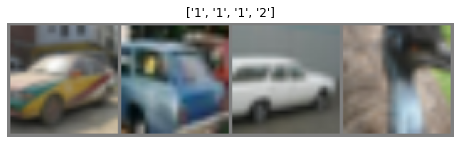

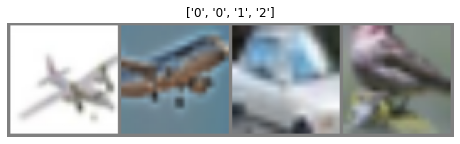

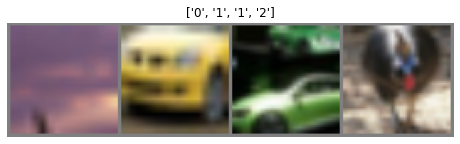

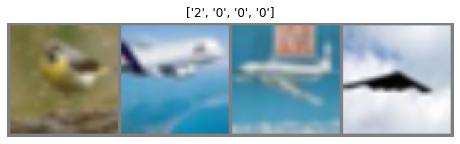

In [6]:
for i in range(4):
    show_batch_images(trainloader)

## Step 2: Create Model Class

### Module Class

<pre><code>
import torch

class CNNModel(nn.Module):
    def __init__(self):
      """
      In the constructor we instantiate modules (conv,maxpool,relu,linear, etc) and assign them as
      member variables.
      """
      
      super(CNNModel, self).__init__()

    def forward(self, x):
      """
      In the forward function we accept a Tensor of input data and we must return a Tensor of output data. We can use Modules defined in the constructor as      well as arbitrary operators on Tensors.
      """
      return out


### Sequential Class

<pre>torch.nn.Sequential(*args)</pre>

Can pass in a list of operations and convert directly to Module without class defination

**Example**
<pre>model = nn.Sequential(
          nn.Conv2d(1,20,5),
          nn.ReLU(),
          nn.Conv2d(20,64,5),
          nn.ReLU()
        )

**Example 2**

<pre>convs=[nn.Conv2d(1,20,5),
          nn.ReLU(),
          nn.Conv2d(20,64,5),
          nn.ReLU()]
model = nn.Sequential(*convs)

### LeNet

We show the architecture and code of a simple LeNet model as a demonstration 

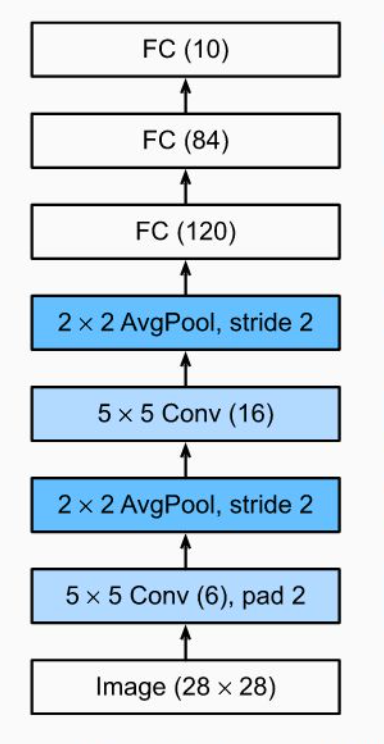

In [ ]:

class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.AvgPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 3)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


## Step 3: Instantiate Model Class

In [ ]:
lenet=LeNet().to(device)
lenet

## Step 4: Train Model

  1. Clear Gradients
  2. Forward Propogation
  3. Calculate Softmax and Cross Entropy Loss
  4. Calculate Gradients
  5. Update Parameters
  6. REPEAT

In [7]:
'''This is just a utility fuction, pls don't spend too much time on this. We are simply going to call the trainer function over and over again.'''


learning_rate = 0.001
loss_fn = nn.CrossEntropyLoss()

# for param_group in optim.param_groups:param_group['lr'] = param_group['lr']/2
def trainer(model,epochs,trainloader, testloader):
  print_len=int(0.1*len(trainloader))
  optimizer = optim.Adam(model.parameters(), lr=learning_rate)
  scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=2,gamma=0.1)
  loss_list = []
  count = 0
  for epoch in range(epochs):
      scheduler.step()
      for i, (images, labels) in enumerate(trainloader):
          images=images.to(device)
          labels=labels.to(device)

          optimizer.zero_grad() #Clear Gradients
          outputs = model(images) #Forward Propogation
          loss = loss_fn(outputs, labels) #Calculate Softmax and Cross Entropy Loss
          loss.backward() #Calculate Gradients
          optimizer.step() #Update Parameters
          loss_list.append(loss.item())        
         
          if i%print_len==1:
            print(f'[Epoch: {epoch}/{epochs}] [Iteration: {i}]  [Loss: {loss.item():.3f}]')
      # Evaluation
      # Calculate Accuracy        
      train_accuracy = evaluation(trainloader,model.eval())
      test_accuracy = evaluation(testloader,model.eval())

      print('****************************************************************************************************')
      print(f'[Epoch: {epoch}/{epochs}] \t [Train Accuracy: {train_accuracy}] \t [Test Accuracy: {test_accuracy}]')
      print('****************************************************************************************************')


In [ ]:
epochs = 8
trainer(lenet, epochs, get_train_loader(size=28,batch_size=64), get_test_loader(size=28,batch_size=64))

# Try it yourself

### AlexNet

Try to code AlexNet using LeNet as a reference

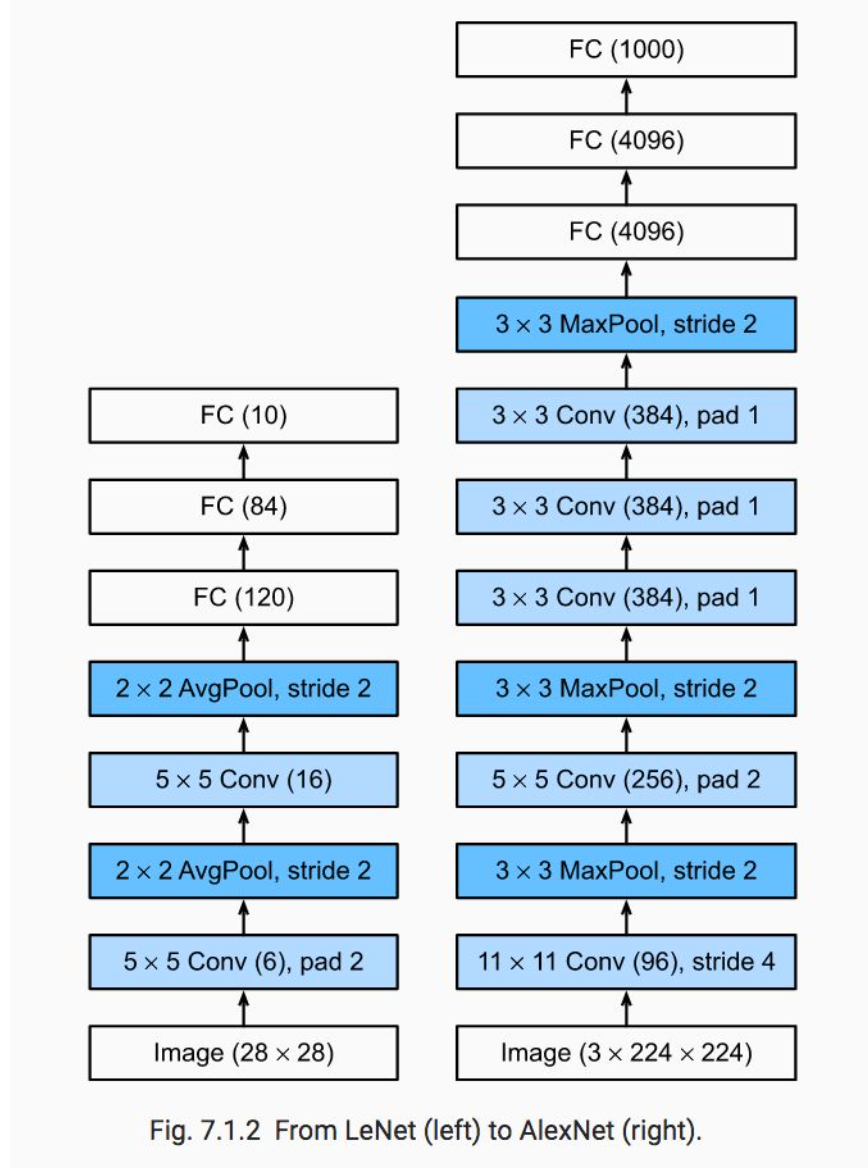

<pre>
AlexNet(    
    (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    )  
  (classifier): Sequential(  
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
    (2): ReLU(inplace=True)
    (3): Dropout(p=0.5, inplace=False)
    (4): Linear(in_features=4096, out_features=4096, bias=True)
    (5): ReLU(inplace=True)
    (6): Linear(in_features=4096, out_features=3, bias=True)
      )
  )  </pre>

In [8]:
# when kernel_size=5: padding=2
# when kernel_size=3, padding=1

class AlexNet(nn.Module):

    def __init__(self, num_classes=3):
        super(AlexNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=11, stride=4, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            ###################################
            ######TODO-Add further layers######
            ###################################
            nn.Conv2d(64, 192, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(192, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2)              
        ) 
        
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear( 256 * 3 * 3 , 4096),            
            ###################################
            ######TODO-Add further layers######
            ###################################
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, num_classes) #Last FC Layer
        )

    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x


In [9]:
model=AlexNet().to(device)
model

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=2304, out_features=4096, bias=True)
    (2): ReLU(inplace=True)
    (3): Dropout(p=0.5, 

In [10]:
epochs=1
trainer(model,epochs,get_train_loader(128,batch_size=120),get_test_loader(128,batch_size=120))

/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:123: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


[Epoch: 0/1] [Iteration: 1]  [Loss: 1.619]
[Epoch: 0/1] [Iteration: 13]  [Loss: 1.078]
[Epoch: 0/1] [Iteration: 25]  [Loss: 1.069]
[Epoch: 0/1] [Iteration: 37]  [Loss: 1.071]
[Epoch: 0/1] [Iteration: 49]  [Loss: 1.036]
[Epoch: 0/1] [Iteration: 61]  [Loss: 1.016]
[Epoch: 0/1] [Iteration: 73]  [Loss: 0.915]
[Epoch: 0/1] [Iteration: 85]  [Loss: 0.910]
[Epoch: 0/1] [Iteration: 97]  [Loss: 0.912]
[Epoch: 0/1] [Iteration: 109]  [Loss: 0.914]
[Epoch: 0/1] [Iteration: 121]  [Loss: 0.890]
****************************************************************************************************
[Epoch: 0/1] 	 [Train Accuracy: 61.67333333333333] 	 [Test Accuracy: 61.266666666666666]
****************************************************************************************************


### VGGs: Networks Using Blocks

A VGG block is k convolutions followed by a max-pool

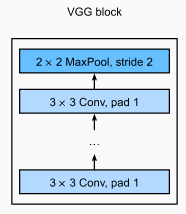

**A Single Convolution VGG Block**
<pre>
Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
</pre>

In [11]:
# As VGG is a larger network, add a simple BatchNorm layers helps in optimisation
def vgg_block(num_convs, in_channels, out_channels):
    layers=[]
    for _ in range(num_convs):
        ################
        ######TODO######
        ################
        layers.append(nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1)) #Append Conv2d to the list
        layers.append(nn.ReLU()) #Append ReLU Activation to the list
        layers.append(nn.BatchNorm2d(out_channels))
        in_channels = out_channels
    layers.append(nn.MaxPool2d(kernel_size=2,stride=2)) #Finally add a MaxPool as the last operation
    return nn.Sequential(*layers) 


We saw that a single block can be defined by: Number of convolutions and number of input/output channels

A VGG is then some N blocks stacked together with a classifier on the top

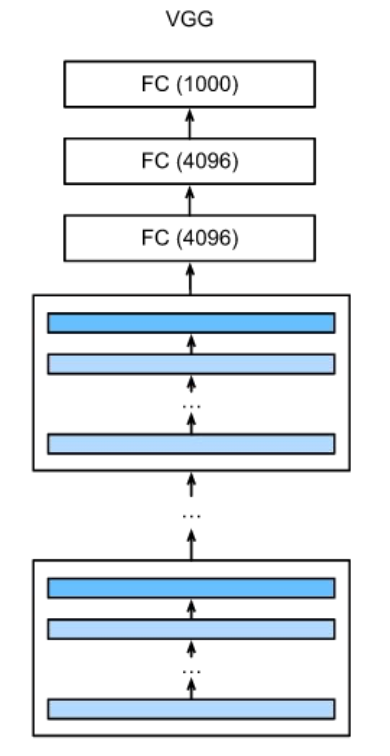

In [12]:
## We have two paramaters: Number of blocks and num of layers in each block
## We also have input/output channels
## we can assume the input is the output of the previous block
# We use MaxPool instead of AveragePool

conv_arch = ((1, 64), (1, 128), (2, 256), (2, 512), (2, 512))

def vgg(conv_arch):
    # The convolutional part
    vgg_conv_blks=[]
    in_channels=3
    for (num_convs, out_channels) in conv_arch:
        vgg_conv_blks.append(vgg_block(num_convs, in_channels, out_channels))
        in_channels = out_channels

    return nn.Sequential(
        *vgg_conv_blks, 
        nn.Flatten(),
        # The fully-connected part
        nn.Linear(8192, 4096), nn.ReLU(), nn.Dropout(0.5),
        nn.Linear(4096, 4096), nn.ReLU(), nn.Dropout(0.5),
        nn.Linear(4096, 3))

vgg(conv_arch)


Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (1): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (2): Sequential(
    (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): MaxPool2d(kernel_si

In [13]:
model=vgg(conv_arch).to(device)
epochs=1
trainer(model,epochs,get_train_loader(128,batch_size=32),get_test_loader(128,batch_size=32))

/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:123: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


[Epoch: 0/1] [Iteration: 1]  [Loss: 7.252]
[Epoch: 0/1] [Iteration: 47]  [Loss: 1.292]
[Epoch: 0/1] [Iteration: 93]  [Loss: 1.071]
[Epoch: 0/1] [Iteration: 139]  [Loss: 0.859]
[Epoch: 0/1] [Iteration: 185]  [Loss: 1.093]
[Epoch: 0/1] [Iteration: 231]  [Loss: 0.950]
[Epoch: 0/1] [Iteration: 277]  [Loss: 0.738]
[Epoch: 0/1] [Iteration: 323]  [Loss: 1.053]
[Epoch: 0/1] [Iteration: 369]  [Loss: 1.184]
[Epoch: 0/1] [Iteration: 415]  [Loss: 1.538]
[Epoch: 0/1] [Iteration: 461]  [Loss: 1.194]
****************************************************************************************************
[Epoch: 0/1] 	 [Train Accuracy: 63.60666666666667] 	 [Test Accuracy: 64.46666666666667]
****************************************************************************************************


### ResNet

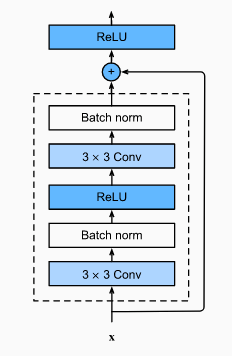

<pre>
ResBlock(
      (conv1): Conv2d(input_channels, num_channels, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (conv2): Conv2d(num_channels, num_channels, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn1): BatchNorm2d(num_channels, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (bn2): BatchNorm2d(num_channels, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
    )

In [14]:
class ResBlock(nn.Module):
    def __init__(self, input_channels, num_channels, strides=1):
        super().__init__()
        ################
        ######TODO######
        ################
        self.conv1 = nn.Conv2d(input_channels, num_channels, kernel_size=3, padding=1, stride=strides) #instantiate  conv2d module (use input strides)
        self.conv2 = nn.Conv2d(num_channels, num_channels,kernel_size=3, padding=1)#instantiate  conv2d module (use default strides)
        self.bn1 = nn.BatchNorm2d(num_channels) #instantiate  batchnorm module
        self.bn2 = nn.BatchNorm2d(num_channels) #instantiate  batchnorm module
        self.relu = nn.ReLU() #instantiate relu activation
        self.residual = nn.Conv2d(input_channels, num_channels, kernel_size=(1, 1), stride=strides)
        
    def forward(self, X):
        Y = self.relu(self.bn1(self.conv1(X)))
        Y = self.bn2(self.conv2(Y))
        Y += self.residual(X)
        return self.relu(Y)

In [15]:
def build_res_layer(input_channels, num_channels, num_blocks, stride=1):

        strides = [stride] + [1]*(num_blocks-1) #Except the first block the stride should be 1
        layers = []
        for stride in strides:
            layers.append(ResBlock(input_channels, num_channels, stride))
            input_channels = num_channels
        return layers

In [16]:
class ResNet(nn.Module):
    def __init__(self, block, num_blocks, num_classes=3):
        super(ResNet, self).__init__()
        self.in_planes = 64
        
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2)
        self.layer1 = nn.Sequential(*build_res_layer(input_channels=self.in_planes, num_channels=64, num_blocks=num_blocks[0]))
        ################
        ######TODO######
        ################
        self.layer2 = nn.Sequential(*build_res_layer(input_channels=64, num_channels=128, num_blocks=num_blocks[1], stride=2))  # call build_res_layer function with input_channels=64, num_channels=128, stride=2
        self.layer3 = nn.Sequential(*build_res_layer(input_channels=128, num_channels=256, num_blocks=num_blocks[2], stride=2))  # call build_res_layer function with input_channels=128, num_channels=256, stride=2
        self.layer4 = nn.Sequential(*build_res_layer(input_channels=256, num_channels=512, num_blocks=num_blocks[3], stride=2))
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512, num_classes)


    def forward(self,x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)
 
        ################
        ######TODO######
        ################
        ''' Complete the forward method '''
        ''' maxpool() -> layer1() -> layer2() -> layer3() -> layer4() '''
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        y = self.fc(x)
        
        return y
        

In [17]:
cfg = {
    'resnet18':[2, 2, 2, 2],
    'resnet34':[3, 4, 6, 3]
}
ResNet(ResBlock, num_blocks=cfg['resnet18'])

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU()
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): ResBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU()
      (residual): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
    )
    (1): ResBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn1): BatchNorm2d(64, eps=1e-05, mom

In [18]:
model=ResNet(ResBlock, num_blocks=cfg['resnet18']).to(device)
epochs=1
trainer(model,epochs,get_train_loader(120,batch_size=8),get_test_loader(120,batch_size=8))

/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:123: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


[Epoch: 0/1] [Iteration: 1]  [Loss: 1.561]
[Epoch: 0/1] [Iteration: 188]  [Loss: 0.772]
[Epoch: 0/1] [Iteration: 375]  [Loss: 0.973]
[Epoch: 0/1] [Iteration: 562]  [Loss: 0.887]
[Epoch: 0/1] [Iteration: 749]  [Loss: 1.149]
[Epoch: 0/1] [Iteration: 936]  [Loss: 0.879]
[Epoch: 0/1] [Iteration: 1123]  [Loss: 0.500]
[Epoch: 0/1] [Iteration: 1310]  [Loss: 1.303]
[Epoch: 0/1] [Iteration: 1497]  [Loss: 1.164]
[Epoch: 0/1] [Iteration: 1684]  [Loss: 1.058]
[Epoch: 0/1] [Iteration: 1871]  [Loss: 0.705]
****************************************************************************************************
[Epoch: 0/1] 	 [Train Accuracy: 69.94666666666667] 	 [Test Accuracy: 71.1]
****************************************************************************************************
